In [63]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas_datareader as pdr
import datetime as dt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [27]:

df=yf.download('AMZN', start ='2010-01-01', end='2023-04-25')

[*********************100%***********************]  1 of 1 completed


In [29]:
df.head(4)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,6.8125,6.8305,6.6570,6.6950,6.6950,151998000
2010-01-05,6.6715,6.7740,6.5905,6.7345,6.7345,177038000
2010-01-06,6.7300,6.7365,6.5825,6.6125,6.6125,143576000
2010-01-07,6.6005,6.6160,6.4400,6.5000,6.5000,220604000


In [30]:
df.tail(4)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-19,101.580002,105.120003,101.389999,104.300003,104.300003,58398900
2023-04-20,103.529999,105.250000,103.209999,103.809998,103.809998,57696900
2023-04-21,106.099998,108.150002,105.080002,106.959999,106.959999,86689700
2023-04-24,107.660004,109.230003,105.070000,106.209999,106.209999,69575600


In [31]:
df=df.reset_index()
df.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,6.8125,6.8305,6.6570,6.6950,6.6950,151998000
1,2010-01-05,6.6715,6.7740,6.5905,6.7345,6.7345,177038000
2,2010-01-06,6.7300,6.7365,6.5825,6.6125,6.6125,143576000
3,2010-01-07,6.6005,6.6160,6.4400,6.5000,6.5000,220604000


In [33]:
###dropping the date  and adjusted close column 
df= df.drop(['Date', 'Adj Close'], axis=1)
df.head(4)

,Open,High,Low,Close,Volume
0,6.8125,6.8305,6.6570,6.6950,151998000
1,6.6715,6.7740,6.5905,6.7345,177038000
2,6.7300,6.7365,6.5825,6.6125,143576000
3,6.6005,6.6160,6.4400,6.5000,220604000


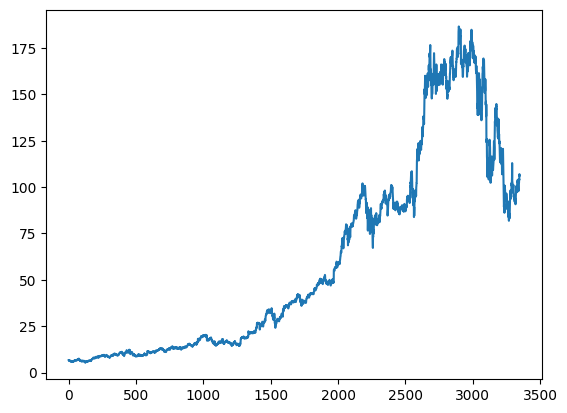

In [34]:
plt.plot(df.Close)

In [36]:
##Moving Average(MA) for 100 days 
##rolling function 
ma100 =df.Close.rolling(100).mean()

In [37]:
##We can see that for the firts 100 values 
ma100

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
3344    95.1984
3345    95.3094
3346    95.4062
3347    95.5417
3348    95.6643
Name: Close, Length: 3349, dtype: float64

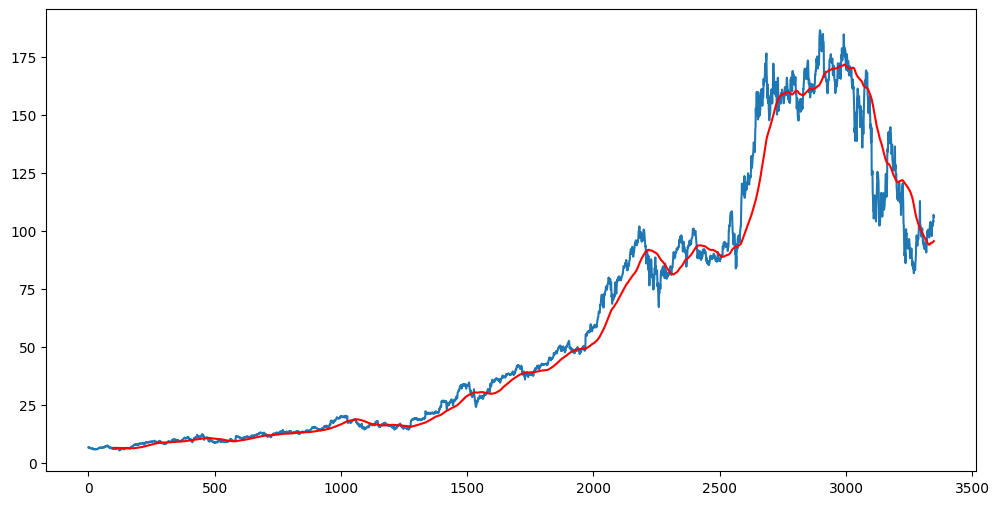

In [40]:
##plot the MA(moving average)
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [ ]:
##Moving Average or Exponential Moving Average

In [41]:
ma200= df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3344    107.11060
3345    107.08430
3346    107.03585
3347    106.99900
3348    106.94840
Name: Close, Length: 3349, dtype: float64

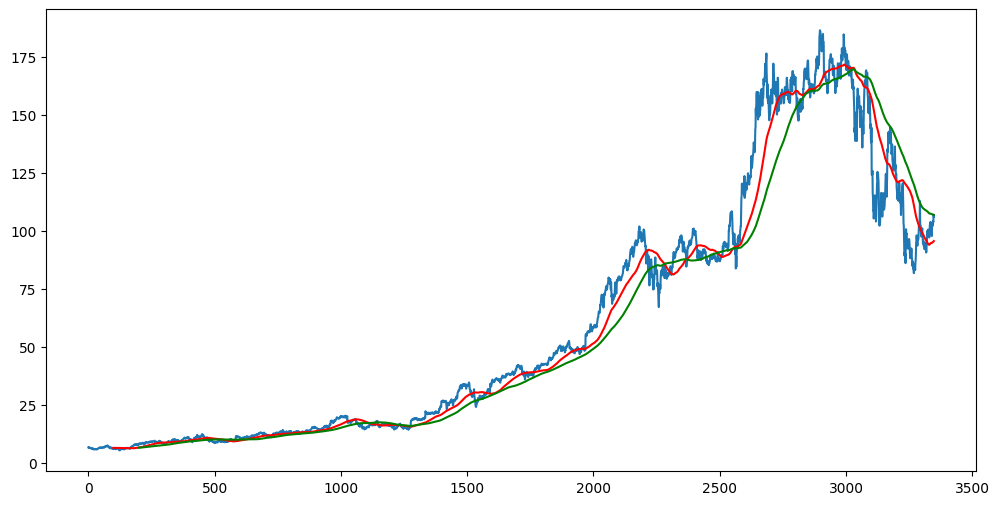

In [42]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [43]:
df.shape

(3349, 5)

In [50]:
##split data into training and testing 
###Starting from the zero index until the 70% of the total values 
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing =pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])


In [51]:
data_training.shape

(2344, 1)

In [52]:
data_testing.shape

(1005, 1)

In [53]:
data_testing.head()

,Close
2344,96.921501
2345,96.325996
2346,95.575996
2347,95.041000
2348,98.123001


In [55]:
###Scaling the data 
scaler= MinMaxScaler(feature_range=(0,1))

In [56]:
data_training_array=scaler.fit_transform(data_training)

In [57]:
data_training_array

array([[0.01309752],
       [0.01350665],
       [0.012243  ],
       ...,
       [0.92865503],
       [0.92891399],
       [0.95396965]])

In [58]:
data_training_array.shape
##(index 0=2344 and index 1 =1)

(2344, 1)

In [59]:
X_train =[]
y_train=[]

for i in range(100, data_training_array.shape[0]):
    X_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

In [64]:
X_train.shape
##We have 2244 rows and 100 columns.
##The first 100 values have become columns


(2244, 100, 1)

In [61]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
##Machine learning model 

In [69]:
model= Sequential()
model.add(LSTM(units=50, activation ='relu', return_sequences= True, 
               input_shape=(X_train.shape[1], 1)))##1 because our index 100 is in position 1. Number 1 because we are working with df.Close column but if we have more columns then the number increases.
model.add(Dropout(0.2))



model.add(LSTM(units=60, activation ='relu', return_sequences= True)) 
               
model.add(Dropout(0.3))




model.add(LSTM(units=80, activation ='relu', return_sequences= True))
               
model.add(Dropout(0.4))



model.add(LSTM(units=120, activation ='relu'))
               
model.add(Dropout(0.5))


model.add(Dense(units =1 ))

In [70]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [71]:
model.compile(optimizer='adam', loss='mean_squared_error')##time series analysis, we keep the loss as mean squared error, as we are not dealing with classification
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
71/71 [==============================] - 91s 639ms/step - loss: 0.0258
Epoch 2/50
71/71 [==============================] - 43s 603ms/step - loss: 0.0046
Epoch 3/50
71/71 [==============================] - 42s 588ms/step - loss: 0.0044
Epoch 4/50
71/71 [==============================] - 52s 732ms/step - loss: 0.0044
Epoch 5/50
71/71 [==============================] - 54s 765ms/step - loss: 0.0040
Epoch 6/50
71/71 [==============================] - 45s 627ms/step - loss: 0.0038
Epoch 7/50
71/71 [==============================] - 47s 657ms/step - loss: 0.0053
Epoch 8/50
71/71 [==============================] - 77s 1s/step - loss: 0.0031
Epoch 9/50
71/71 [==============================] - 61s 851ms/step - loss: 0.0030
Epoch 10/50
71/71 [==============================] - 45s 626ms/step - loss: 0.0032
Epoch 11/50
71/71 [==============================] - 49s 687ms/step - loss: 0.0029
Epoch 12/50
71/71 [==============================] - 43s 602ms/step - loss: 0.0026
Epoch 13/50
71/7

In [72]:
model.save('keras_model.h5')

In [73]:
past_100_days = data_training.tail(100)

In [74]:
##testing data 
final_df = past_100_days.append(data_testing,ignore_index=True)

C:\Users\brill\AppData\Local\Temp\ipykernel_11572\3976939425.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing,ignore_index=True)


In [75]:
final_df.head()

,Close
0,84.508499
1,88.617996
2,83.419998
3,84.959503
4,81.456497


In [76]:
##scale testing  data 
input_data = scaler.fit_transform(final_df)
input_data

array([[0.14501247],
       [0.1794383 ],
       [0.13589395],
       ...,
       [0.30670381],
       [0.33309181],
       [0.32680895]])

In [77]:
input_data.shape

(1105, 1)

In [78]:
X_test=[]
y_test=[]


for i in range(100, input_data.shape[0]):
    X_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [80]:
X_test, y_test =np.array(X_test), np.array(y_test)
print(X_test.shape)
print(y_test.shape)

(1005, 100, 1)
(1005,)


In [81]:
##making prediction 

y_predicted = model.predict(X_test)

32/32 [==============================] - 19s 217ms/step


In [82]:
y_predicted.shape

(1005, 1)

In [83]:
y_test

array([0.24899792, 0.24400929, 0.23772644, ..., 0.30670381, 0.33309181,
       0.32680895])

In [84]:
y_predicted

array([[0.23295078],
       [0.23526068],
       [0.23739158],
       ...,
       [0.28372827],
       [0.28624123],
       [0.2891891 ]], dtype=float32)

In [85]:
scaler.scale_

array([0.00837714])

In [86]:
scale_factor=1/0.00837714
y_predicted= y_predicted*scale_factor
y_test = y_test* scale_factor

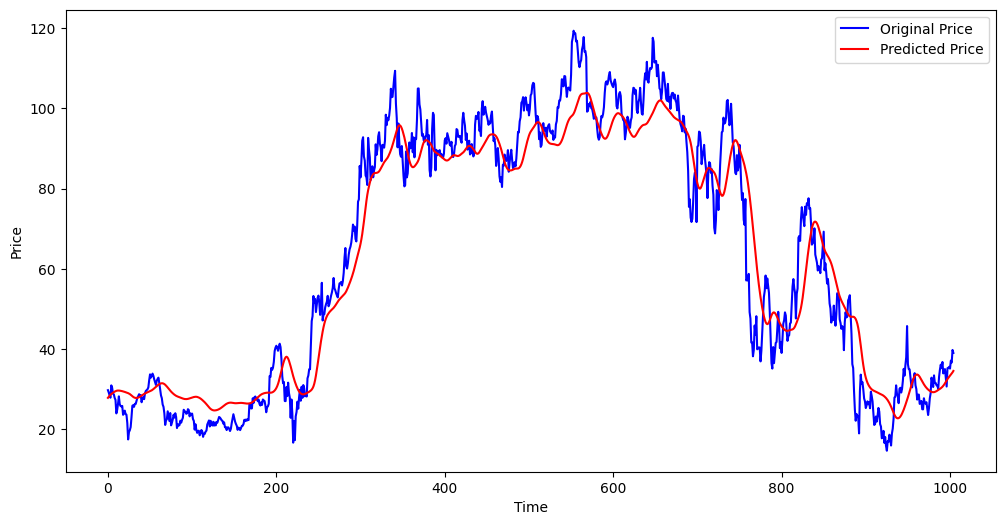

In [87]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
